In [1]:
import pandas as pd
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle("./data/dataframe2.pkl")

In [2]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap(projection='cyl')

In [3]:
newData = pd.DataFrame(df,columns=['latitude','longitude'])

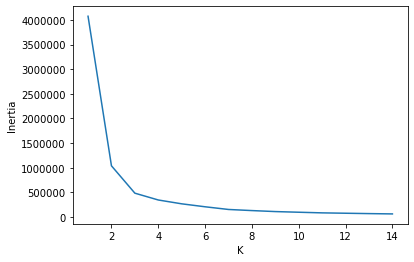

In [4]:
############
##  KMEANS - ELBOW

from sklearn.cluster import KMeans

k_values = range(1, 15)
inertia_values = [KMeans(k).fit(newData).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


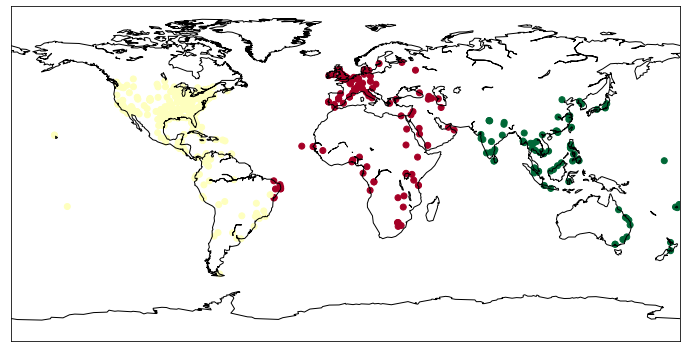

In [5]:
############
##  KMEANS

from sklearn.cluster import KMeans

num_cluster = 3
cluster_model = KMeans(n_clusters=num_cluster)
assigned_cluster = cluster_model.fit_predict(newData)

fig = plt.figure(figsize=(12, 8))
map_plotter.scatter(newData.longitude, newData.latitude, latlon=True, c=assigned_cluster, cmap="RdYlGn")
#map_plotter.shadedrelief()
map_plotter.drawcoastlines()
#map_plotter.drawcountries()
plt.show()

In [6]:
############
##  DBSCAN - without metric

from sklearn.cluster import DBSCAN
cluster_model2 = DBSCAN(eps=10, min_samples=3)
assigned_clusters2 = cluster_model2.fit_predict(newData)

#plt.scatter(newData.latitude, newData.longitude, c=assigned_clusters2, cmap="RdYlGn")
#plt.show()


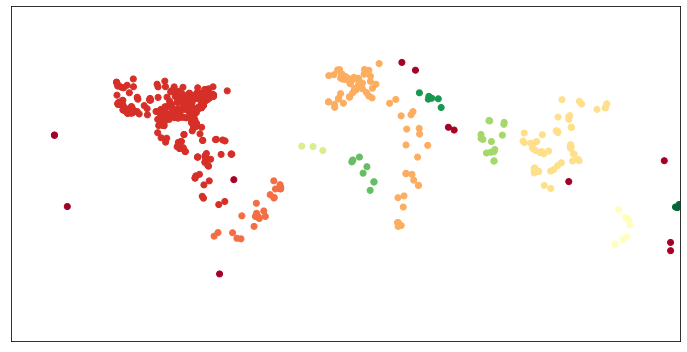

In [7]:
############
##  DBSCAN - without metric -Plot

fig = plt.figure(figsize=(12, 8))
map_plotter.scatter(df.longitude, df.latitude, latlon=True, c=assigned_clusters2, cmap="RdYlGn")
#map_plotter.shadedrelief()
plt.show()

In [8]:
############
##  DBSCAN - with metric

from sklearn.cluster import DBSCAN
from math import radians, degrees, sin, cos, asin, acos, sqrt

def great_circle(p1, p2):
    lat1 = p1[0]
    lon1 = p1[1]
    lat2 = p2[0]
    lon2 = p2[1]
    if (lat1==lat2 and lon1==lon2):
        return 0
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    return 6371 * (acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2)))

cluster_model3 = DBSCAN(eps=800, min_samples=3, metric=great_circle)
df["cluster"] = cluster_model3.fit_predict(newData)

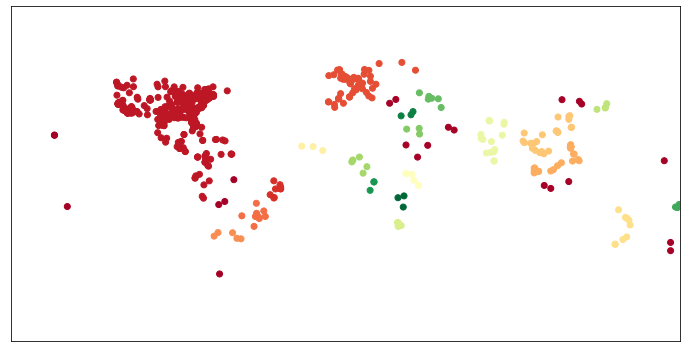

In [9]:
############
##  DBSCAN - with metric -Plot

fig = plt.figure(figsize=(12, 8))
map_plotter.scatter(df.longitude, df.latitude, latlon=True, c=df.cluster, cmap="RdYlGn")
#map_plotter.shadedrelief()
#map_plotter.drawcoastlines()
#map_plotter.drawcountries()
plt.show()


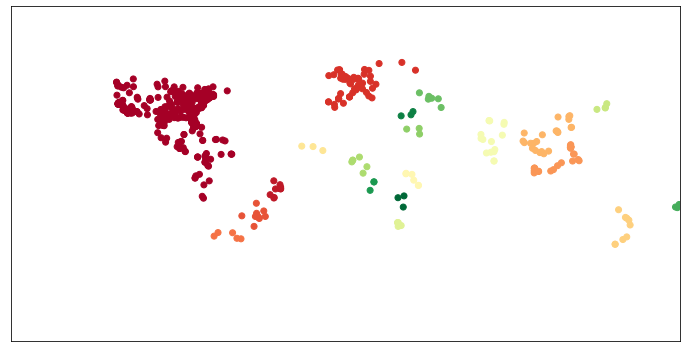

In [10]:
############
##  DBSCAN - with metric -Plot only clustered

df2 = df[df.cluster != -1]
fig = plt.figure(figsize=(12, 8))
map_plotter.scatter(df2.longitude, df2.latitude, latlon=True, c=df2.cluster, cmap="RdYlGn")
#map_plotter.shadedrelief()
#map_plotter.drawcoastlines()
#map_plotter.drawcountries()
plt.show()


In [ ]:
df2.groupby(["cluster"]).size()

In [11]:
df.to_pickle("./data/dataframe3.pkl")